In [1]:
## This version excludes CONTINUOUS Variables and the RFD variables AND _wHICH VARIABLES 3/27/2024 and con_max_consultorder_time/day and drg name
## 4/4/2024 Added QUINTILE variables
## 4/8/2024 Added QUINTILE varables by service
## 4/9/2024 Added more consult and imaging variables (e.g. ad,it order to consult order, admit order to imaging read)
## 4/11/2024 Added QUINTILE variables by service for the additional variables
# 06/12/2024: Added gender, added imaging_order_before_consult_order and consult_order_before_imaging order variables, excluded 290 patients in 2022, dropped raw race/insurance categories
# 06/14/2024: Removed quintiles
# 06/20/2024: Set seed for reproducibility
# 06/22/2024: Added sample size for validation
# 07/05/2024: Collapsed Cardiology into Medicine
# 07/08/2024: Added labels
# 07/25/2024: Removed duplicated patients from master file
# 08/01/2024: Changed XGBoost hyperparmeter tuning to Haipeng's code and using only one model, streamlined so all shap plots in one jupyter notebook
# 08/07/2024: Added continuous features, add discretizer and removed variables >=99% missing 
# 08/15/2024: Added viz_right_service_hf_yn variable
# 08/23/2024: Removing discretization for Hospital Consult Counts
# 08/24/2024: Removing discretization for all count variables
# 08/25/2024: Removed 20 additional variables from the continuous SHAP plots, kept 1 additional one (con_max_consult_order_to_sign_which)
# 08/27/2024: Discretized quintile variables 
# 02/22/2025: Removed subgroup analyses (df_home, df_hf), saved models instead of figures

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from los_functions_v3 import *
warnings.filterwarnings('ignore')

In [3]:
import sklearn
import feature_engine

print("Scikit-Learn version:", sklearn.__version__)
print("Feature-Engine version:", feature_engine.__version__)


Scikit-Learn version: 1.2.2
Feature-Engine version: 1.7.0


In [4]:
#all hospitalized patients 
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_all["viz_service_collapsed"] = df_all["viz_service_collapsed"].apply(map_med)

In [5]:
# Dictionary of data frames with their names
dfs = {"df_all": df_all}

fp_simple = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_simple.xlsx'
fp_complex = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los.xlsx'
output_folder = '/gpfs/milgram/project/rtaylor/imc33/LOS/output'
model_simple = '/gpfs/milgram/project/rtaylor/imc33/LOS/output/model_simple.pkl'
model_complex = '/gpfs/milgram/project/rtaylor/imc33/LOS/output/model_complex.pkl'

### Simple (without quintiles)

Running on df_all
df_filt shape: (12771, 885)
X train_preprocessed shape: (10246, 316)
X val preprocessed shape: (2525, 316)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 210)
X_val_selected shape: (2525, 210)
100%|██████████| 20/20 [00:17<00:00,  1.16trial/s, best loss: -0.7467726809713422]
XGB Best parameters for 210 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


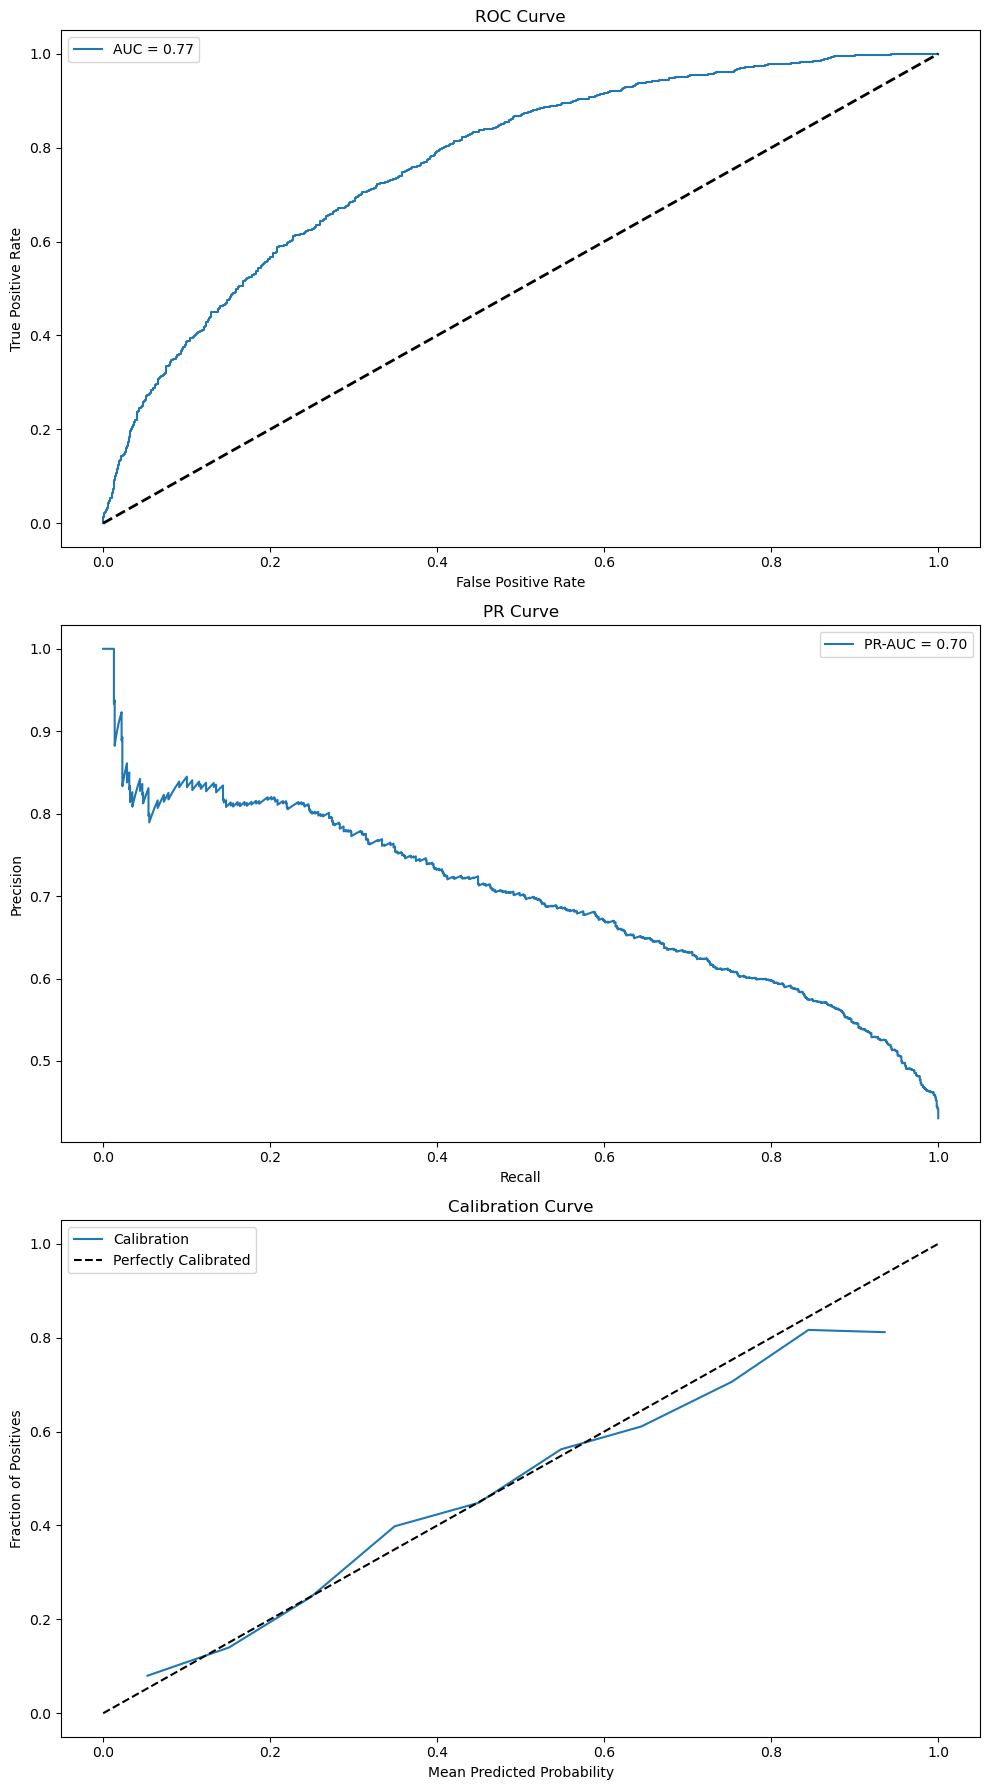

Specificity : 0.7726
Sensitivity : 0.6044
Accuracy : 0.7002
Precision : 0.6677
F1 score : 0.6345
Of 1438 people who did not have a prolonged LOS, 1111 (77.26%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 657 (60.44%) were correctly classified.
summary_consult_count_all
summary_first_rfd_status_No
viz_disp_collapsed_Home
img_count_any
viz_drg_Respiratory infections & inflammations w mcc
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
census_daily_ed_count
census_daily_inpt_count
viz_age
viz_service_collapsed_Surgical Services
img_count_us
thro_ed_arrival_time_Afternoon
summary_last_rfd_status_No
summary_consult_count_unique_services
con_service_gastroenterology_count
viz_service_collapsed_Medicine
viz_ynhhs_sg2_service_Digestive Health - Medical
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
con_service_hospitalist_service_count
viz_admission_day_Fri
viz_insurance_Medicare
summary_last_edd_doc_time_Morning
con_service_oncology_count
s

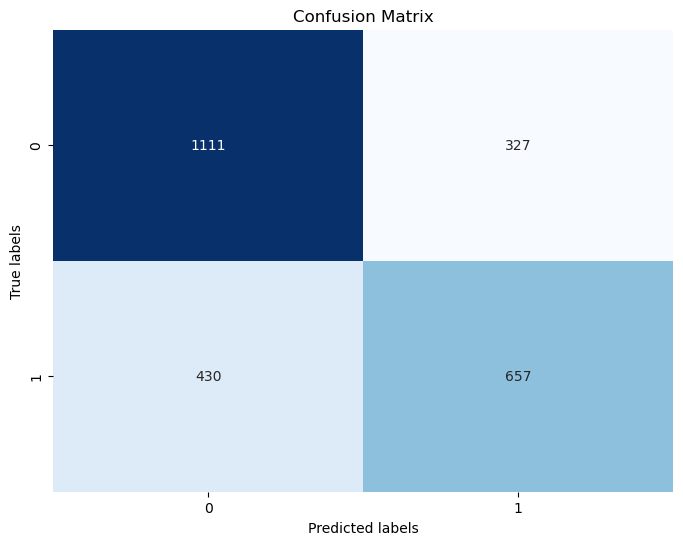

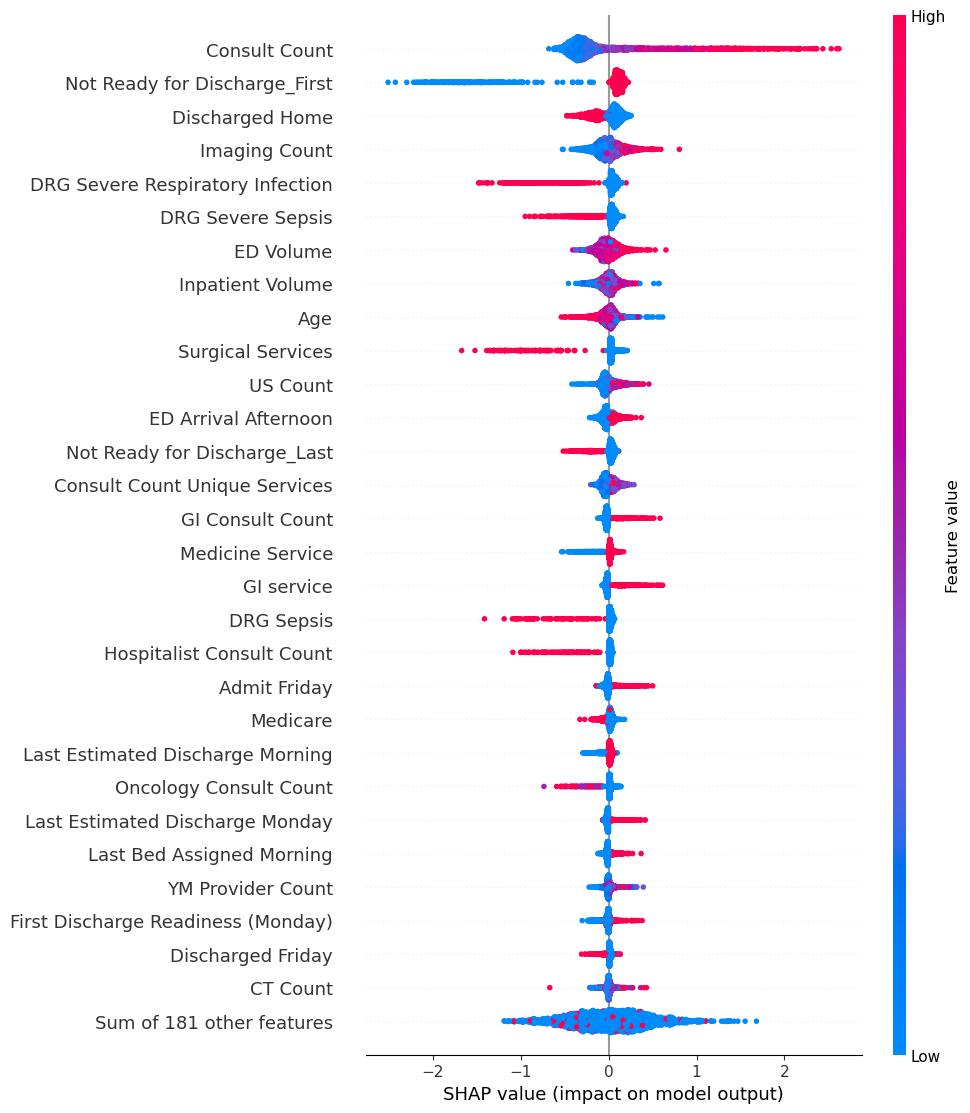

Model saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output/model_simple.pkl


In [8]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_simple, output_folder, df_name, suffix="simple", model_path=model_simple)

### With Quintiles

Running on df_all
df_filt shape: (12771, 885)
X train_preprocessed shape: (10246, 576)
X val preprocessed shape: (2525, 576)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 301)
X_val_selected shape: (2525, 301)
100%|██████████| 20/20 [00:22<00:00,  1.13s/trial, best loss: -0.7883737266850445]
XGB Best parameters for 301 features: {'colsample_by_tree': 0.9689612066730257, 'learning_rate': 0.24580725496486383, 'max_depth': 15, 'n_estimators': 24, 'num_leaves': 31, 'reg_lambda': 0.9983513763315744}


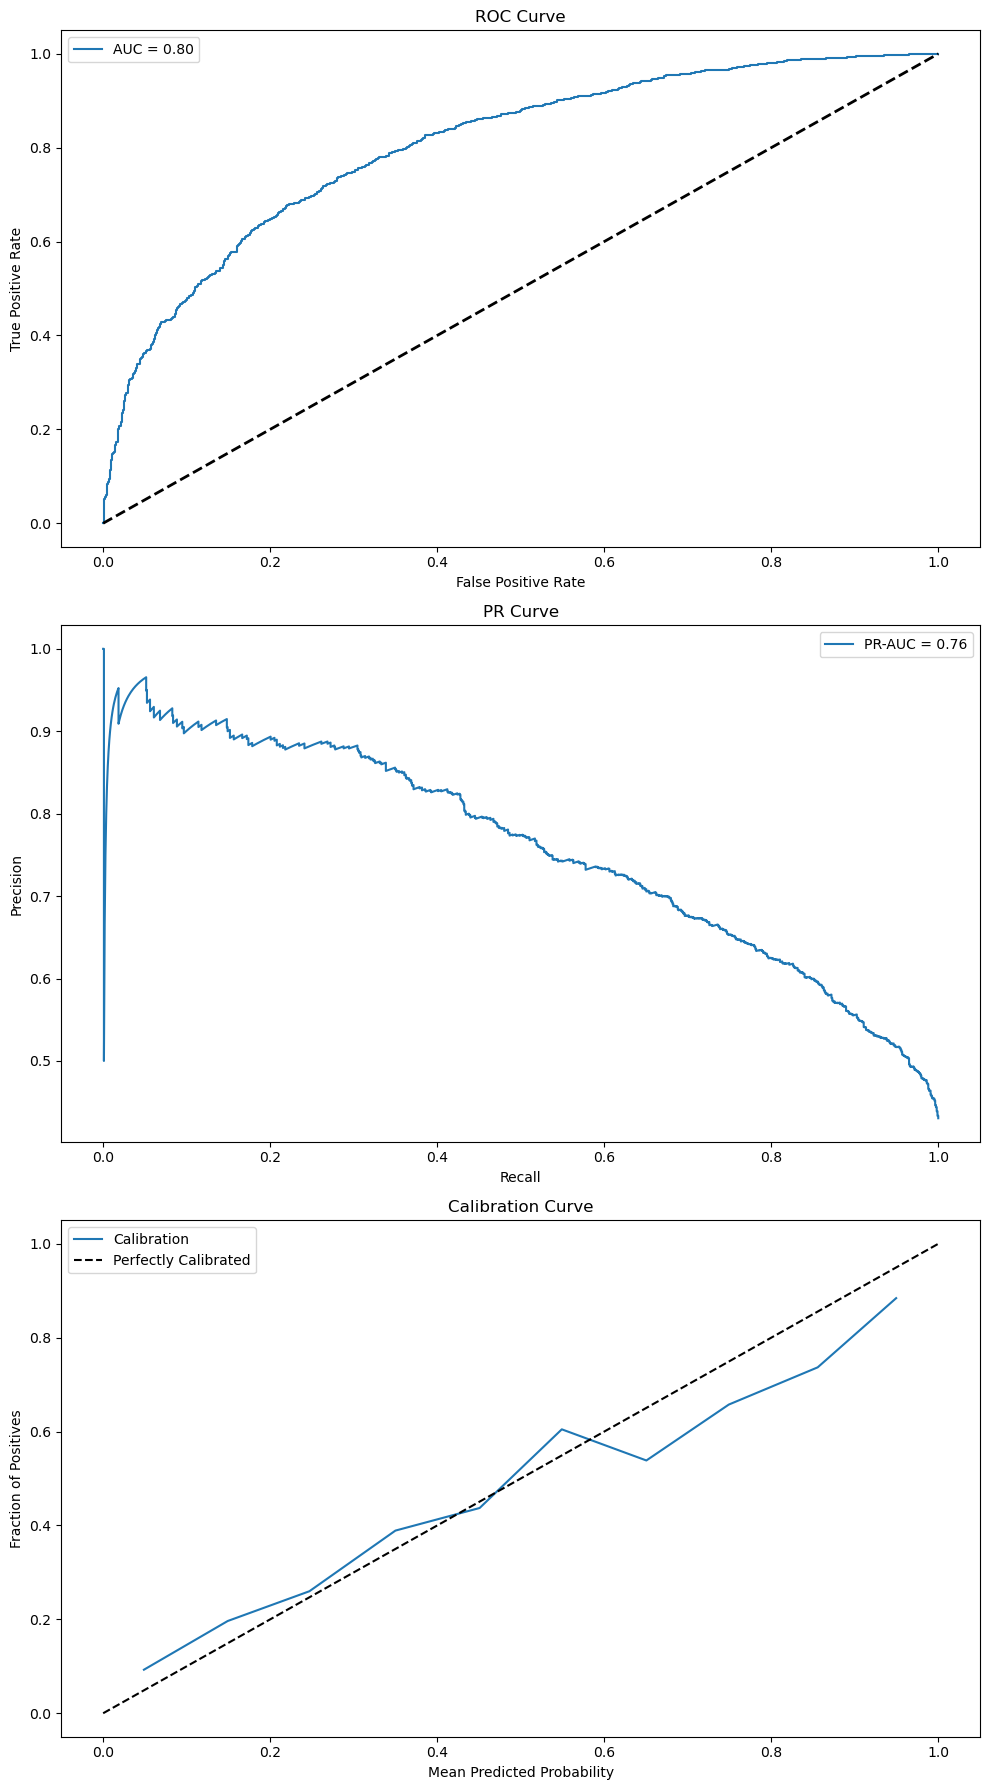

Specificity : 0.8136
Sensitivity : 0.6339
Accuracy : 0.7362
Precision : 0.7200
F1 score : 0.6742
Of 1438 people who did not have a prolonged LOS, 1170 (81.36%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 689 (63.39%) were correctly classified.
con_max_admit_order_to_consult_order_any_quintile
con_avg_admit_order_to_consult_completion_any_quintile
img_avg_admit_order_to_imaging_order_any_quintile
summary_first_rfd_status_No
summary_consult_count_all
viz_drg_Respiratory infections & inflammations w mcc
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
viz_age
viz_service_collapsed_Surgical Services
thro_ed_arrival_time_Afternoon
census_daily_inpt_count
con_max_consult_order_to_sign_any_quintile
census_daily_ed_count
viz_disp_collapsed_Home
summary_last_rfd_status_No
img_max_admit_order_to_imaging_order_us_quintile
img_max_order_to_completion_any_quintile
summary_last_edd_doc_time_Morning
img_avg_admit_order_to_imaging_read_any_quintile
viz_drg_Septice

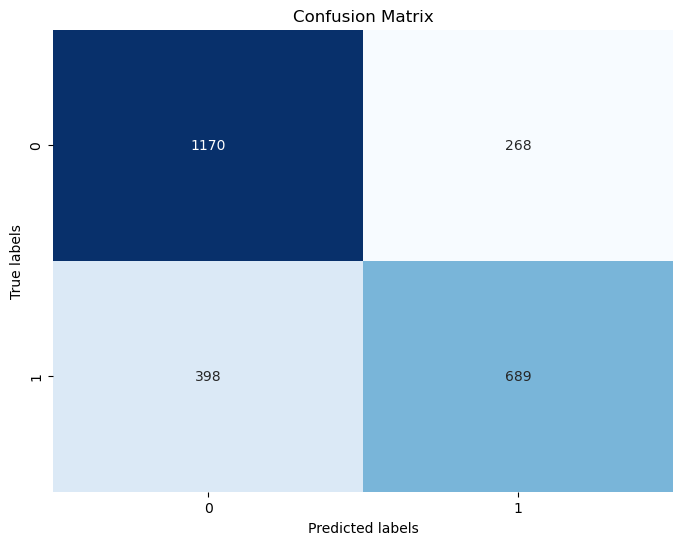

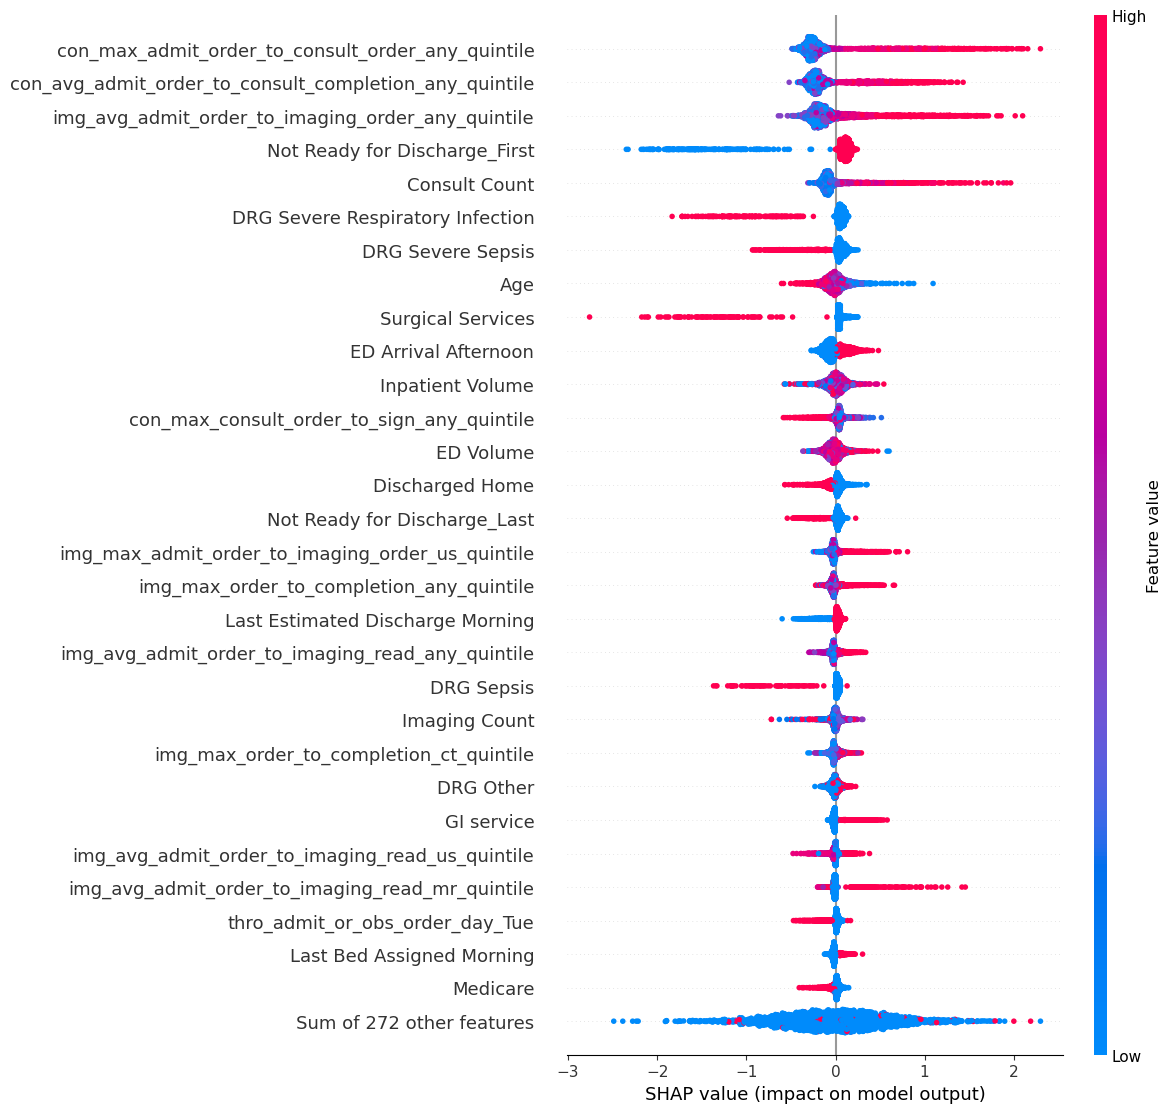

Model saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output/model_complex.pkl


In [7]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_complex, output_folder, df_name, suffix="with_quintiles", model_path=model_complex)